In [ ]:
# !pip install scipy

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("iris/iris.data", header=None, delimiter=",")

In [4]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Summarizing the dataset.

### 	Dimensions of the datasetle.


In [6]:
dimensions = df.shape
print("Dimensions of the dataset:", dimensions)

Dimensions of the dataset: (150, 5)


### Peek at the data itself.

In [7]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


### Statistical Summary of All Attributes

In [8]:
print("Statistical summary of all attributes:")
print(df.describe().round(2))

Statistical summary of all attributes:
            0       1       2       3
count  150.00  150.00  150.00  150.00
mean     5.84    3.05    3.76    1.20
std      0.83    0.43    1.76    0.76
min      4.30    2.00    1.00    0.10
25%      5.10    2.80    1.60    0.30
50%      5.80    3.00    4.35    1.30
75%      6.40    3.30    5.10    1.80
max      7.90    4.40    6.90    2.50


### Breakdown of the Data by the Class Variable

In [9]:
class_breakdown = df.iloc[:, -1].value_counts()
print("Breakdown of the data by the class variable:")
print(class_breakdown)

Breakdown of the data by the class variable:
4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Visualizing the dataset

### Univariate plots to better understand each attribute.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set(style="whitegrid")

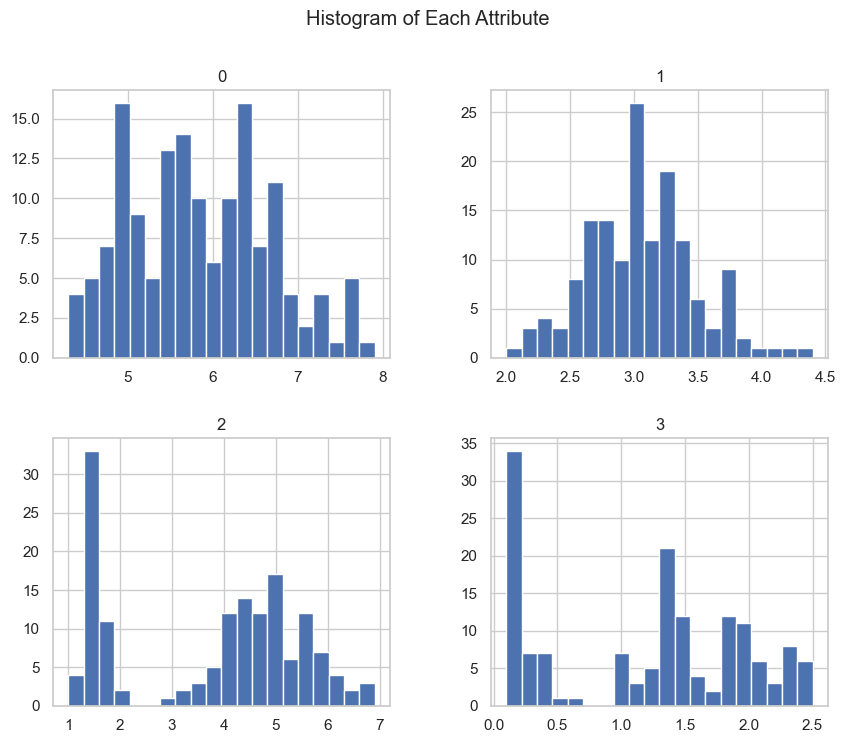

In [12]:
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histogram of Each Attribute')
plt.show()

<Figure size 1000x800 with 0 Axes>

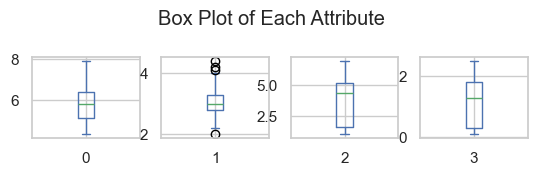

In [13]:
plt.figure(figsize=(10, 8))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.suptitle('Box Plot of Each Attribute')
plt.show()

<Figure size 1000x800 with 0 Axes>

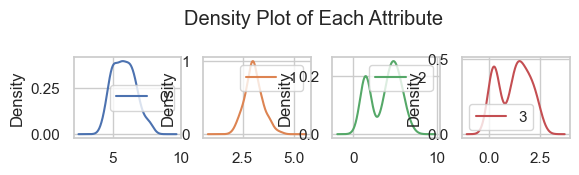

In [14]:
plt.figure(figsize=(10, 8))
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.suptitle('Density Plot of Each Attribute')
plt.show()

### Multivariate plots to better understand the relationships between attributes.



<Figure size 1000x800 with 0 Axes>

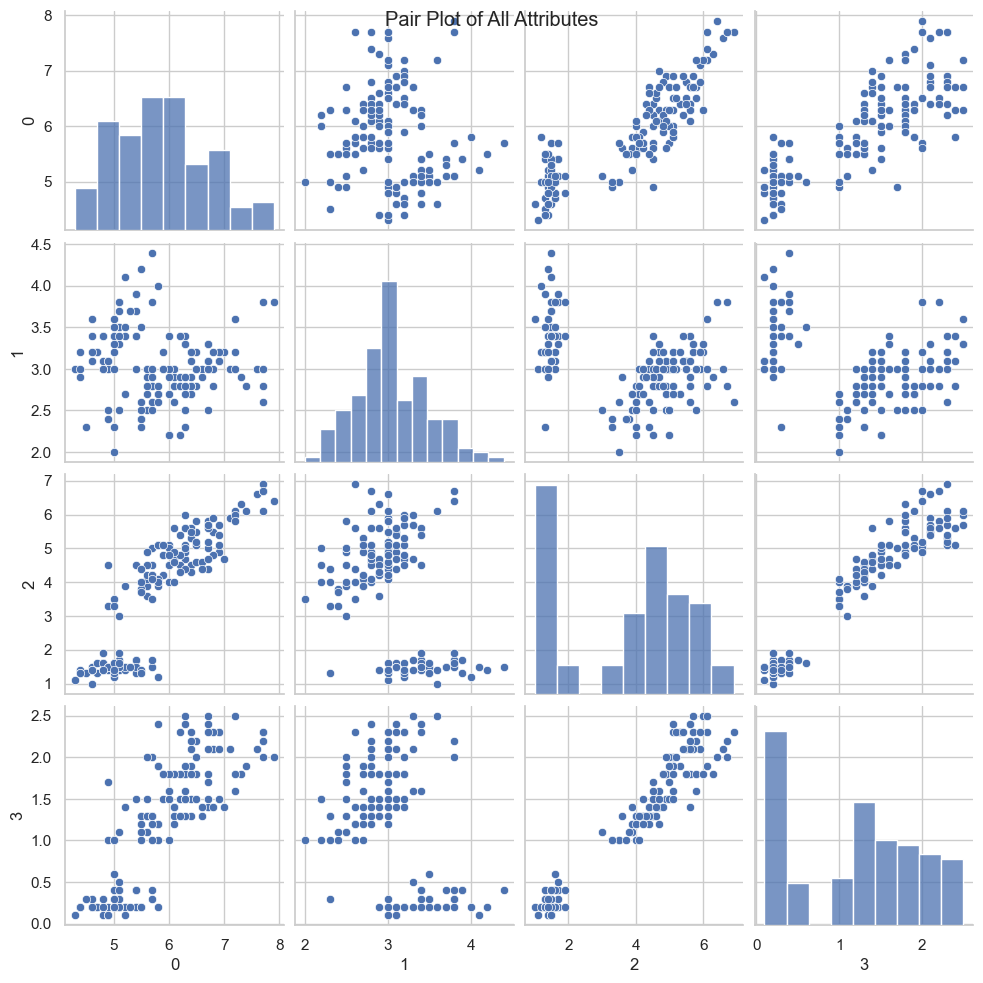

In [15]:
plt.figure(figsize=(10, 8))
sns.pairplot(df)
plt.suptitle('Pair Plot of All Attributes')
plt.show()

# Evaluating some algorithms.

### Separate out a validation dataset.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (the last column)

# Split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)

Training set size: (120, 4)
Validation set size: (30, 4)


### Set-up the test harness to use 10-fold cross validation.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [19]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

### Build multiple different models to predict species from flower measurements

In [21]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define a list of models to evaluate
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))

# Evaluate each model using 10-fold cross-validation
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.2f} ({cv_results.std():.2f})")


C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.95 (0.07)
Decision Tree: 0.93 (0.08)
K-Nearest Neighbors: 0.95 (0.07)
Support Vector Machine: 0.96 (0.07)
Random Forest: 0.93 (0.08)
Naive Bayes: 0.94 (0.07)


In [ ]:

# Calculate the mean accuracy for each model
mean_scores = [result.mean() for result in results]

# Find the index of the model with the highest mean accuracy
best_index = mean_scores.index(max(mean_scores))

# Get the best model name and the model itself
best_model_name = names[best_index]
best_model = models[best_index][1]

print(f"Best Model: {best_model_name}")
# print(f"Validation Accuracy of the best model: {val_accuracy:.2f}")

# Making some predictions.

In [ ]:
# Train the best model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = best_model.predict(X_val)

# Evaluate the predictions
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy of the best model: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)